In [1400]:
import sys
print(sys.version)

3.8.2 (tags/v3.8.2:7b3ab59, Feb 25 2020, 23:03:10) [MSC v.1916 64 bit (AMD64)]


In [1401]:
import pandas as pd
df_train = pd.read_csv('dataset_train_NASDAQ100.csv')
df_test = pd.read_csv('dataset_test_sp500.csv')
df_train

,Symbol,open,52_wk_low,52_wk_hi,volume,avg_volume,market_cap,PE_ratio,EPS_ratio,target
0,ATVI,90.07,50.51,92.99,4409111.0,6510317.0,7.056200e+10,32.05,2.85,Overvalued
1,ADBE,480.00,255.13,536.88,2266132.0,2510958.0,2.327120e+11,44.79,10.83,Overvalued
2,AMD,95.98,36.75,97.98,39520899.0,45555233.0,1.138810e+11,128.16,0.74,Overvalued
3,ALXN,156.79,72.67,160.03,2861609.0,2414704.0,3.441600e+10,36.52,4.31,Undervalued
4,ALGN,561.63,127.88,579.04,464242.0,683792.0,4.498700e+10,25.96,21.98,Near Fair Value
...,...,...,...,...,...,...,...,...,...,...
97,WBA,45.05,33.36,54.88,9895372.0,8215398.0,3.905700e+10,NaN,-0.80,Overvalued
98,WDAY,226.00,107.75,259.01,1666914.0,2081525.0,5.463600e+10,NaN,-1.45,Overvalued
99,XEL,65.06,46.58,76.44,2221705.0,2487246.0,3.533300e+10,23.41,2.81,Overvalued
100,XLNX,150.45,67.68,154.12,2856568.0,3928238.0,3.627600e+10,60.45,2.45,Overvalued


In [1402]:
# perform preprocessing data before they can be used

# removing N/A
df_train_drop_na = df_train.dropna()
df_test_drop_na = df_test.dropna()

# remove intersection between two dataframes in test set
df_test_drop_na = pd.merge(df_test_drop_na, df_train_drop_na, how='outer', indicator=True).query('_merge=="left_only"').drop(['_merge'], axis=1)

# drop Symbol col
p_df_train = df_train_drop_na.drop(['Symbol', 'target'], axis=1)
p_df_test = df_test_drop_na.drop(['Symbol', 'target'], axis=1)

# p_df_train
p_df_test

,open,52_wk_low,52_wk_hi,volume,avg_volume,market_cap,PE_ratio,EPS_ratio
0,174.12,114.04,182.55,1779190.0,2324304.0,1.008230e+11,20.50,8.53
1,108.17,61.61,115.14,2779390.0,4760728.0,1.940560e+11,57.90,1.89
2,105.26,62.55,109.15,5690813.0,8076007.0,1.891700e+11,23.44,4.57
3,324.38,119.01,328.83,229004.0,288245.0,1.465100e+10,71.25,4.55
4,257.60,137.15,271.18,1261375.0,1853069.0,1.730680e+11,32.15,8.12
...,...,...,...,...,...,...,...,...
405,100.78,54.62,101.87,489433.0,823960.0,1.834600e+10,82.69,1.23
406,108.74,54.95,110.66,1330971.0,1573888.0,3.274900e+10,31.52,3.44
407,383.72,150.06,388.92,169632.0,358241.0,2.049100e+10,43.87,8.76
408,43.20,23.58,51.68,706674.0,2054834.0,7.125000e+09,18.37,2.37


In [1403]:
# standardize features
sdd_df_train = ((p_df_train) - p_df_train.mean()) / p_df_train.std()
sdd_df_test = ((p_df_test) - p_df_test.mean()) / p_df_test.std()
sdd_df_train


,open,52_wk_low,52_wk_hi,volume,avg_volume,market_cap,PE_ratio,EPS_ratio
0,-0.462414,-0.407495,-0.473499,-0.208110,-0.026430,-0.298036,-0.254899,-0.442254
1,0.355018,0.420166,0.394112,-0.337179,-0.302141,0.130507,-0.188904,0.376821
2,-0.450025,-0.463153,-0.463746,1.906644,2.665274,-0.183549,0.242968,-0.658826
3,-0.322546,-0.317861,-0.342465,-0.301314,-0.308776,-0.393566,-0.231744,-0.292398
4,0.526144,-0.094544,0.476516,-0.445706,-0.428103,-0.365628,-0.286446,1.521267
...,...,...,...,...,...,...,...,...
95,-0.229341,-0.140129,-0.243506,-0.439156,-0.432540,-0.398196,-0.162640,-0.321138
96,-0.160979,0.186939,-0.057001,-0.399513,-0.325640,-0.321645,-0.300588,0.312157
99,-0.514844,-0.423392,-0.505847,-0.339855,-0.303775,-0.391142,-0.299656,-0.446360
100,-0.335836,-0.338045,-0.354017,-0.301618,-0.204435,-0.388650,-0.107782,-0.483310


In [1404]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# find score for Gaussian Naive Bayes classifer
gnb = GaussianNB()
gnb.fit(sdd_df_train, df_train_drop_na['target'])
gnb_score = gnb.score(sdd_df_test, df_test_drop_na['target'])
print("GNB classifer score (accuracy) = ", gnb_score)

# find score for KNN classifer
knn = KNeighborsClassifier()
knn.fit(sdd_df_train, df_train_drop_na['target'])
knn_score = knn.score(sdd_df_test, df_test_drop_na['target'])
print("KNN classifer score (accuracy) = ", knn_score)

# find score for SVM classifier
svm = SVC()
svm.fit(sdd_df_train, df_train_drop_na['target'])
svm_score = svm.score(sdd_df_test, df_test_drop_na['target'])
print("SVM classifer score (accuracy) = ", svm_score)

GNB classifer score (accuracy) =  0.5926829268292683
KNN classifer score (accuracy) =  0.6170731707317073
SVM classifer score (accuracy) =  0.6317073170731707


In [1405]:
print('df_train_drop_na', df_train_drop_na['target'].shape)
print('p_df_train', sdd_df_train.shape)
print('df_test_drop_na', df_test_drop_na['target'].shape)
print('p_df_test', sdd_df_test.shape)

df_train_drop_na (88,)
p_df_train (88, 8)
df_test_drop_na (410,)
p_df_test (410, 8)


In [1406]:
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.regularizers import l2
from sklearn.preprocessing import LabelEncoder
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(sdd_df_test, df_test_drop_na['target'],test_size=0.2, random_state=42, shuffle=True)

print('X_train.shape:', X_train.shape)
print('X_test.shape', X_test.shape)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_train = to_categorical(np.asarray(y_train).astype('float32'))

y_test = label_encoder.fit_transform(y_test)
y_test = to_categorical(np.asarray(y_test).astype('float32'))

model = Sequential()
model.add(Flatten())
# model.add(Dense(500, activation='relu', input_shape=(328,)))
model.add(Dense(500, activation='relu', input_dim=8))
model.add(Dense(500, activation='relu', kernel_initializer='random_normal'))
# model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
# opt = SGD(lr=0.01, momentum=0.9)
# opt = 'rmsprop'
opt = 'adam'
# opt = 'adadelta'
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=100, epochs=60, verbose=1, validation_split=0.25)
model.summary()


results_train = clf.evaluate(X_train, y_train)
results_test = clf.evaluate(X_test, y_test)

print('\n')
print('results_train: ', results_train)
print('reslts_test:', results_test)


# X_train

val_accuracy: 0.6707
Epoch 18/150
3/3 [==============================] - 0s 25ms/step - loss: 0.7564 - accuracy: 0.6483 - val_loss: 1.5049 - val_accuracy: 0.6707
Epoch 19/150
3/3 [==============================] - 0s 26ms/step - loss: 0.7691 - accuracy: 0.6155 - val_loss: 1.5165 - val_accuracy: 0.6707
Epoch 20/150
3/3 [==============================] - 0s 26ms/step - loss: 0.7467 - accuracy: 0.6200 - val_loss: 1.5165 - val_accuracy: 0.6707
Epoch 21/150
3/3 [==============================] - 0s 25ms/step - loss: 0.7382 - accuracy: 0.6391 - val_loss: 1.5017 - val_accuracy: 0.6707
Epoch 22/150
3/3 [==============================] - 0s 25ms/step - loss: 0.7393 - accuracy: 0.6372 - val_loss: 1.5071 - val_accuracy: 0.6707
Epoch 23/150
3/3 [==============================] - 0s 26ms/step - loss: 0.7370 - accuracy: 0.6139 - val_loss: 1.5409 - val_accuracy: 0.6707
Epoch 24/150
3/3 [==============================] - 0s 26ms/step - loss: 0.7472 - accuracy: 0.6318 - val_loss: 1.5964 - val_accuracy:

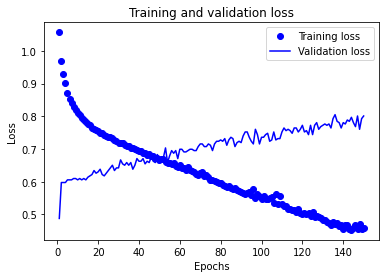

In [1407]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [1408]:
history.history

{'loss': [1.0566883087158203,
  0.9693166613578796,
  0.9281507134437561,
  0.9006566405296326,
  0.8701987862586975,
  0.853763222694397,
  0.8394027948379517,
  0.8297316431999207,
  0.8201345801353455,
  0.8099086284637451,
  0.8026415705680847,
  0.7959682941436768,
  0.7878080606460571,
  0.7812125086784363,
  0.776833176612854,
  0.7720171809196472,
  0.765598475933075,
  0.7625356316566467,
  0.7581533789634705,
  0.7536327242851257,
  0.7490464448928833,
  0.7484209537506104,
  0.7425031661987305,
  0.7411863803863525,
  0.7354720234870911,
  0.7358704209327698,
  0.7332794070243835,
  0.7287793755531311,
  0.7240773439407349,
  0.7193151116371155,
  0.7188546061515808,
  0.7171710133552551,
  0.7125760912895203,
  0.7105614542961121,
  0.7086294889450073,
  0.7031484246253967,
  0.70319664478302,
  0.6986835598945618,
  0.6975997686386108,
  0.6944998502731323,
  0.6935538649559021,
  0.6876976490020752,
  0.6869584321975708,
  0.6825826168060303,
  0.684287965297699,
  0.6799